In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
lats = []
lngs = []

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
from citipy import citipy

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | berlevag
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | lima
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | newport
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | ulaangom
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | semirom
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | araouane
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 of Set 1 | rumonge
Processing R

Processing Record 39 of Set 4 | sinjar
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | andevoranto
City not found. Skipping...
Processing Record 42 of Set 4 | poso
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | ios
Processing Record 46 of Set 4 | kazanskaya
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | bathsheba
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | miragoane
Processing Record 2 of Set 5 | los lunas
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | ardassa
Processing Record 5 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | safaga
Processing Record 8 of Set 5 | nemuro
Processing Record 9 of Set 5 | zaysan
Processing Record 10 of Set 5 | shchuchye
City not found. Skipping...
Processing Re

Processing Record 25 of Set 8 | saquarema
Processing Record 26 of Set 8 | tall kayf
Processing Record 27 of Set 8 | gambela
Processing Record 28 of Set 8 | constantine
Processing Record 29 of Set 8 | ivanava
Processing Record 30 of Set 8 | pierre
Processing Record 31 of Set 8 | hay river
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | colares
Processing Record 34 of Set 8 | ocampo
Processing Record 35 of Set 8 | kuytun
Processing Record 36 of Set 8 | garowe
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | makaha
Processing Record 39 of Set 8 | kandrian
Processing Record 40 of Set 8 | jasper
Processing Record 41 of Set 8 | orel-izumrud
Processing Record 42 of Set 8 | broken hill
Processing Record 43 of Set 8 | olavarria
Processing Record 44 of Set 8 | gilgit
Processing Record 45 of Set 8 | rehoboth
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | quime
Processing Record 48 of Set 8 | jiayuguan
Processing Record 

Processing Record 18 of Set 12 | mercedes
Processing Record 19 of Set 12 | cascais
Processing Record 20 of Set 12 | ust-kuyga
Processing Record 21 of Set 12 | shache
Processing Record 22 of Set 12 | aswan
Processing Record 23 of Set 12 | nimaparha
Processing Record 24 of Set 12 | port blair
Processing Record 25 of Set 12 | beyneu
Processing Record 26 of Set 12 | balykshi
Processing Record 27 of Set 12 | tilichiki
Processing Record 28 of Set 12 | dingle
Processing Record 29 of Set 12 | togur
Processing Record 30 of Set 12 | pingliang
Processing Record 31 of Set 12 | beira
Processing Record 32 of Set 12 | vilhena
Processing Record 33 of Set 12 | tezu
Processing Record 34 of Set 12 | xuddur
Processing Record 35 of Set 12 | springdale
Processing Record 36 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 12 | pemangkat
Processing Record 38 of Set 12 | abonnema
Processing Record 39 of Set 12 | nantucket
Processing Record 40 of Set 12 | bandarbeyla
Processing Recor

In [14]:
len(city_data)

567

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacific Grove,US,2022-07-30 19:06:15,36.6177,-121.9166,73.38,83,20,10.36
1,Berlevag,NO,2022-07-30 19:06:16,70.8578,29.0864,50.00,93,100,17.27
2,Airai,TL,2022-07-30 19:06:16,-8.9266,125.4092,57.88,93,60,3.62
3,Lima,PE,2022-07-30 19:04:18,-12.0432,-77.0282,62.85,72,0,13.80
4,Rikitea,PF,2022-07-30 19:06:17,-23.1203,-134.9692,72.64,75,5,17.13
5,Busselton,AU,2022-07-30 19:04:44,-33.6500,115.3333,54.27,66,100,7.67
6,Newport,GB,2022-07-30 19:05:31,51.5877,-2.9984,68.02,88,100,13.73
7,Aklavik,CA,2022-07-30 19:06:18,68.2191,-135.0107,43.21,84,100,7.38
8,Puerto Ayora,EC,2022-07-30 19:06:18,-0.7393,-90.3518,78.76,83,54,5.99
9,Tiksi,RU,2022-07-30 19:05:31,71.6872,128.8694,45.97,84,35,2.51


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

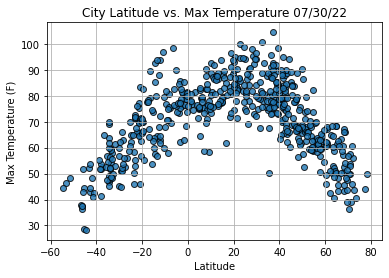

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

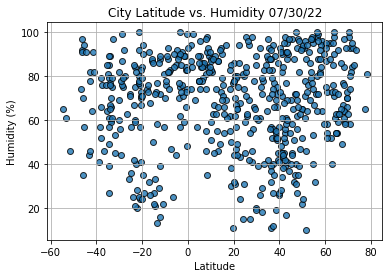

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

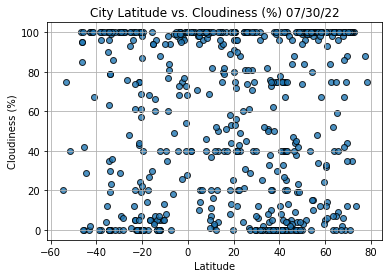

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

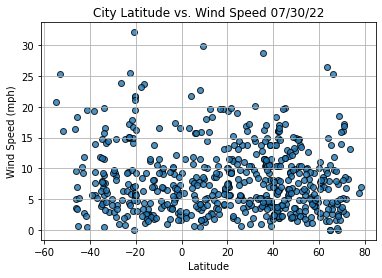

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                     Ulaangom
Country                        MN
Date          2022-07-30 19:06:20
Lat                       49.9811
Lng                       92.0667
Max Temp                     66.9
Humidity                       52
Cloudiness                     74
Wind Speed                   2.73
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
562     True
563     True
564     True
565    False
566     True
Name: Lat, Length: 567, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacific Grove,US,2022-07-30 19:06:15,36.6177,-121.9166,73.38,83,20,10.36
1,Berlevag,NO,2022-07-30 19:06:16,70.8578,29.0864,50.00,93,100,17.27
6,Newport,GB,2022-07-30 19:05:31,51.5877,-2.9984,68.02,88,100,13.73
7,Aklavik,CA,2022-07-30 19:06:18,68.2191,-135.0107,43.21,84,100,7.38
9,Tiksi,RU,2022-07-30 19:05:31,71.6872,128.8694,45.97,84,35,2.51


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

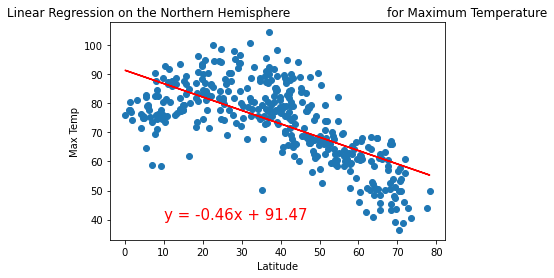

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

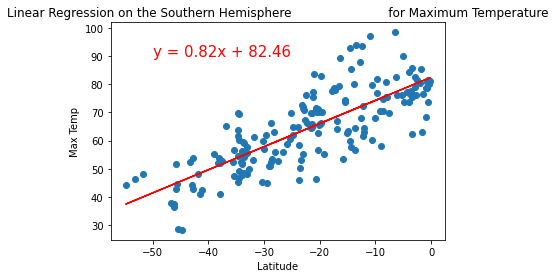

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

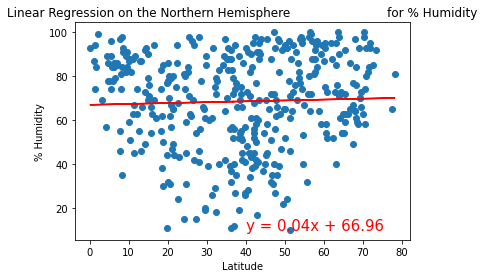

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

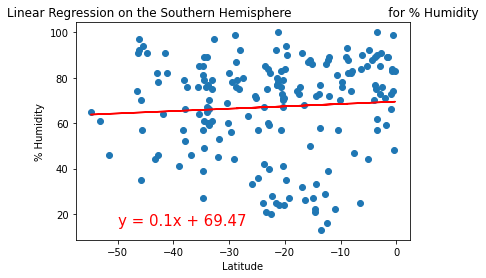

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

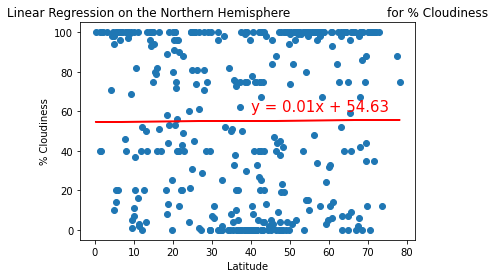

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

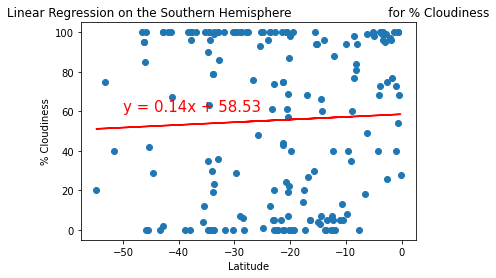

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

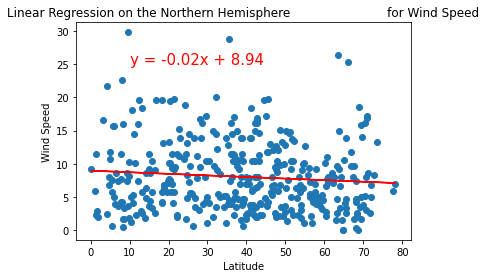

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

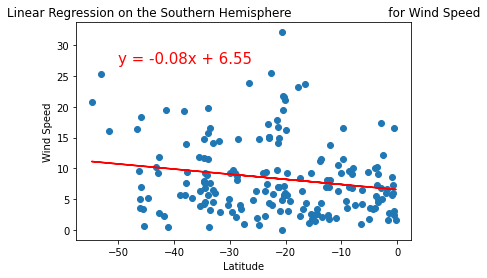

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,27))